<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

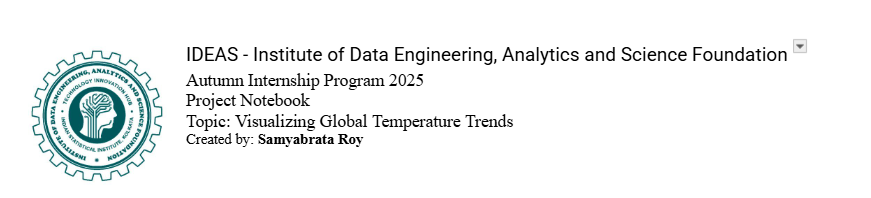

Submitted by Rupsa Saha


# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**   
   ans:Time-series data is simply defined as data
that is collected sequentially over time at
regular or irregular intervals. Instead of being
a random number, each value is assigned to a
specific time (day, month, or year). Time
series data can include daily sales, monthly
temperature readings, or
Annual rainfall and hourly electricity usage.
To put it simply, the order is important
because it demonstrates how things change
over time.
2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
    
   ans: Yes, I think Python is a good choice for this. It has lots of libraries like pandas, matplotlib, seaborn, and plotly that make it easier to create and plot time-series data. Also, Python is easier to learn compared to many other languages. It’s very popular in data science, so we’ll get a lot of support and tutorials if we’re stuck.

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

Yes, we can still copy the data into excel, csv or google sheet. Then, we need to save the dataset in the same folder created for the code and add the folder in VS code workspace.

In [ ]:
import pandas as pd
df_temp= pd.read_csv("monthly_csv.csv")
print(df_temp.head())

In [ ]:
from google.colab import files
uploaded = files.upload()   # Choose your monthly_csv.csv

import pandas as pd
df_temp = pd.read_csv("monthly_csv.csv")
print(df_temp.head())


Saving monthly_csv.csv to monthly_csv.csv
    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

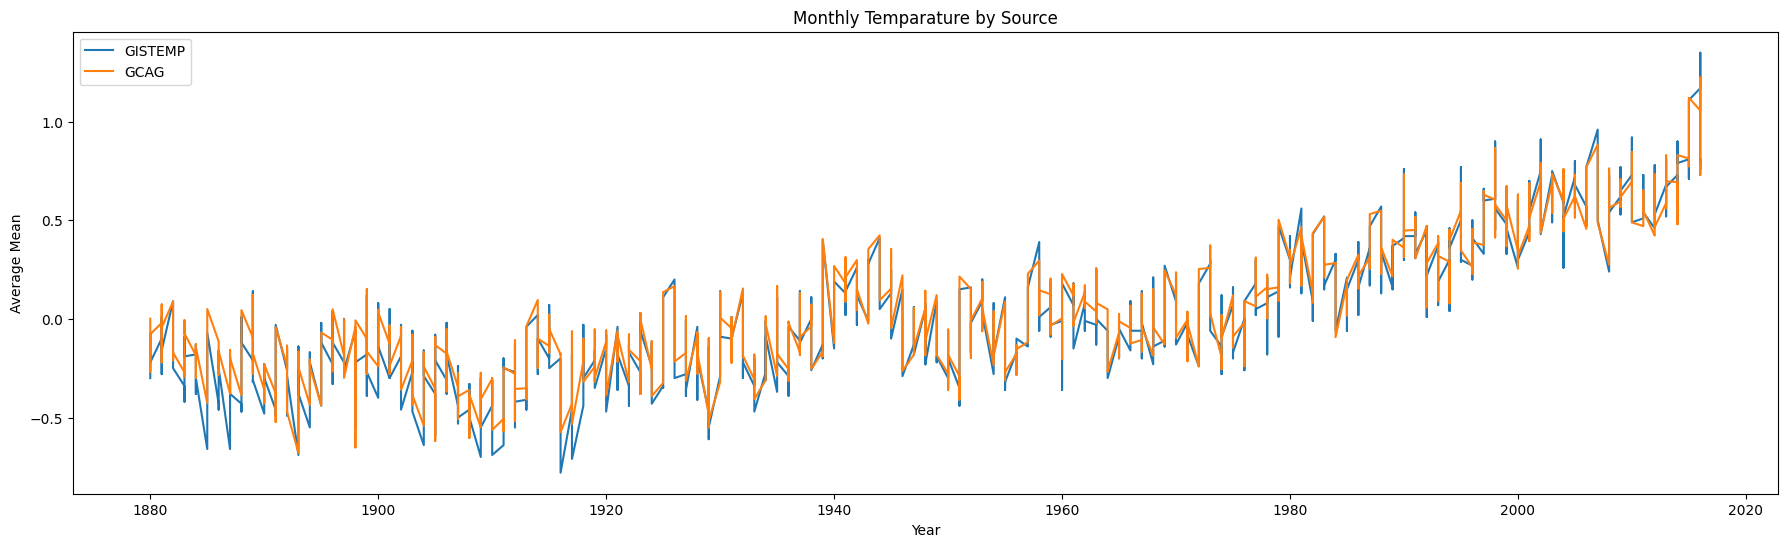

In [ ]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

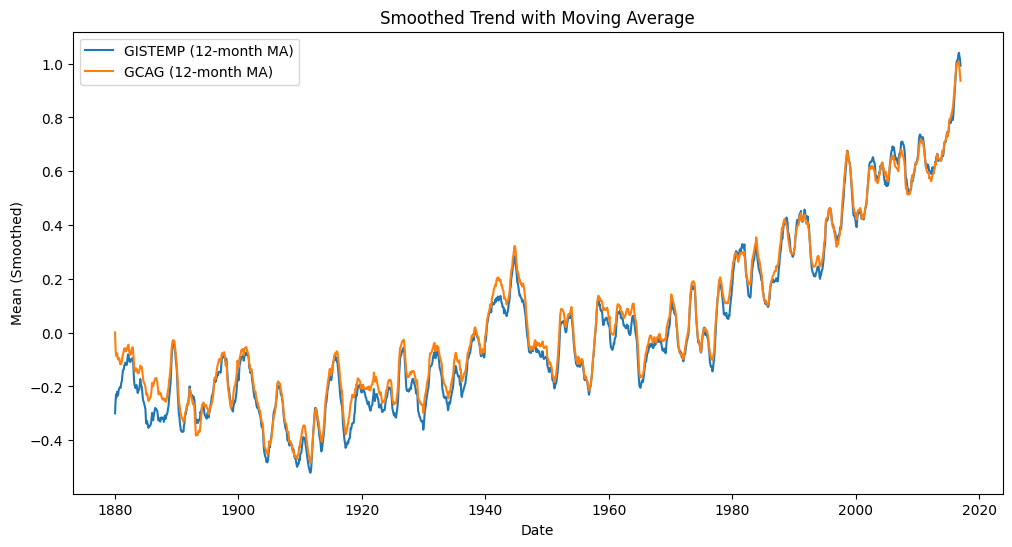

In [ ]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

ans: From the first plot, I can see that the monthly average temperature is going up over time for both sources. There are some ups and downs, but overall the line is rising, which means the earth is gradually warming. When we look at the 12-month moving average, the short-term noise like seasonal effects gets smoothed out and it clearly shows a long-term increasing trend. Therefore the interpretation is that even though temperature varies month to month, the overall direction is steadily upward.

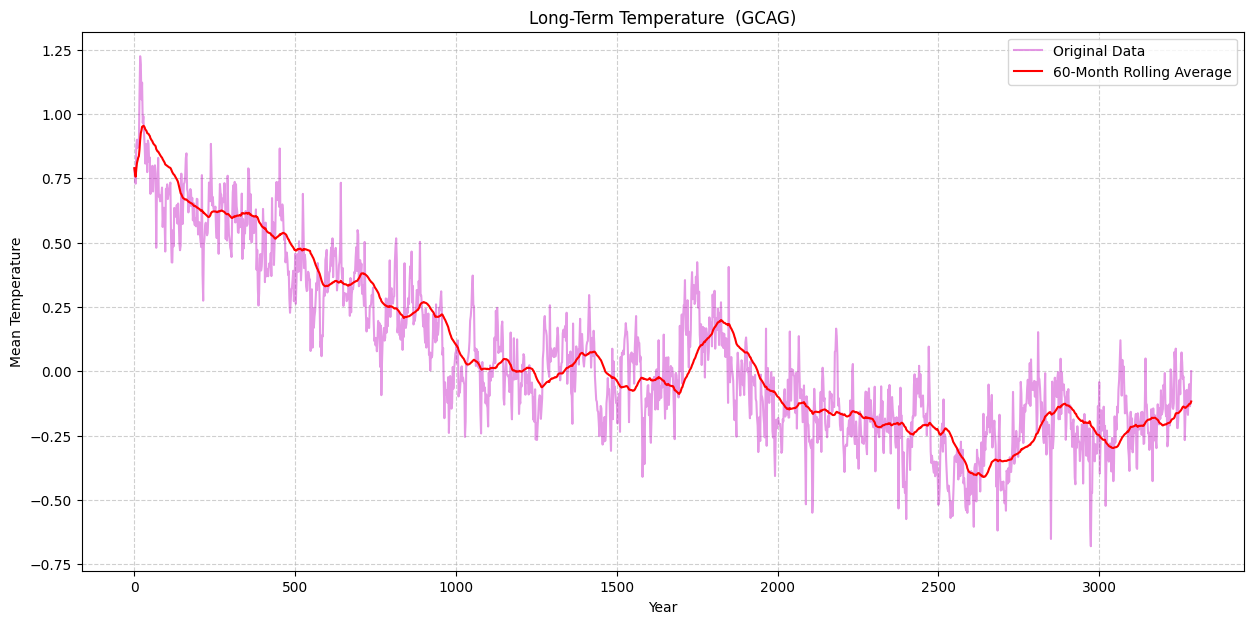

In [ ]:
import matplotlib.pyplot as plt

# 'GCAG'
df_source = df_temp[df_temp['Source'] == source_name].copy()
df_source['Rolling_60M'] = df_source['Mean'].rolling(window=60, min_periods=1).mean()

#graph plotting
plt.figure(figsize=(15,7))
plt.plot(df_source.index, df_source['Mean'], 'm', alpha=0.4, label="Original Data")
plt.plot(df_source.index, df_source['Rolling_60M'], color="red", label="60-Month Rolling Average")
plt.title(f"Long-Term Temperature  ({source_name})")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()





---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

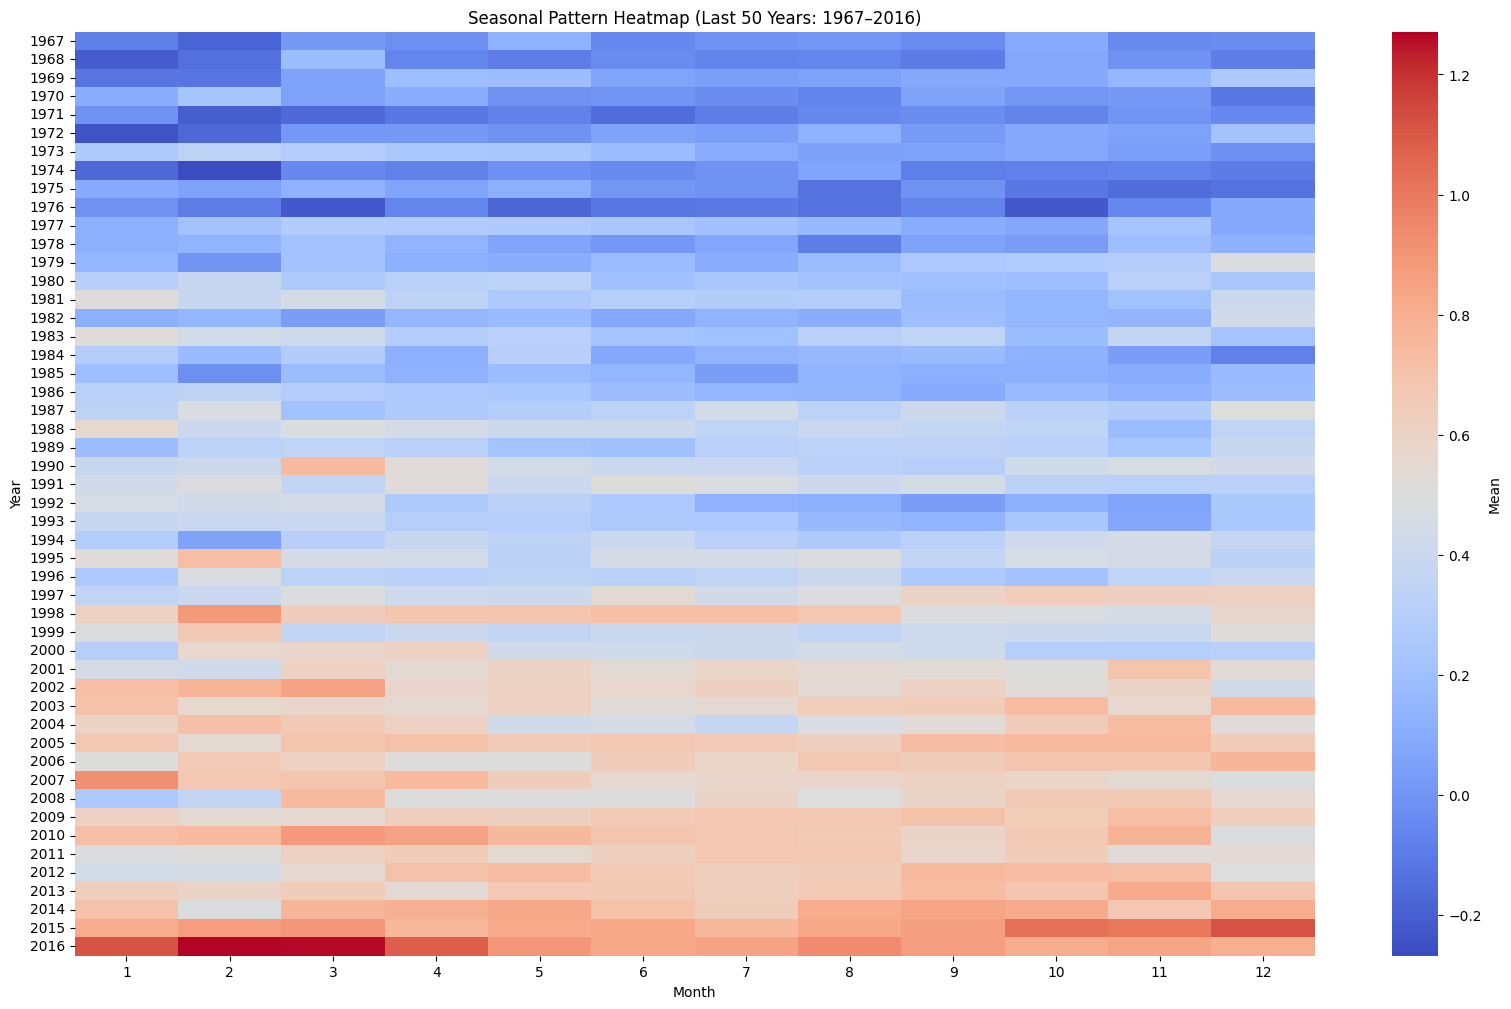

In [ ]:
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

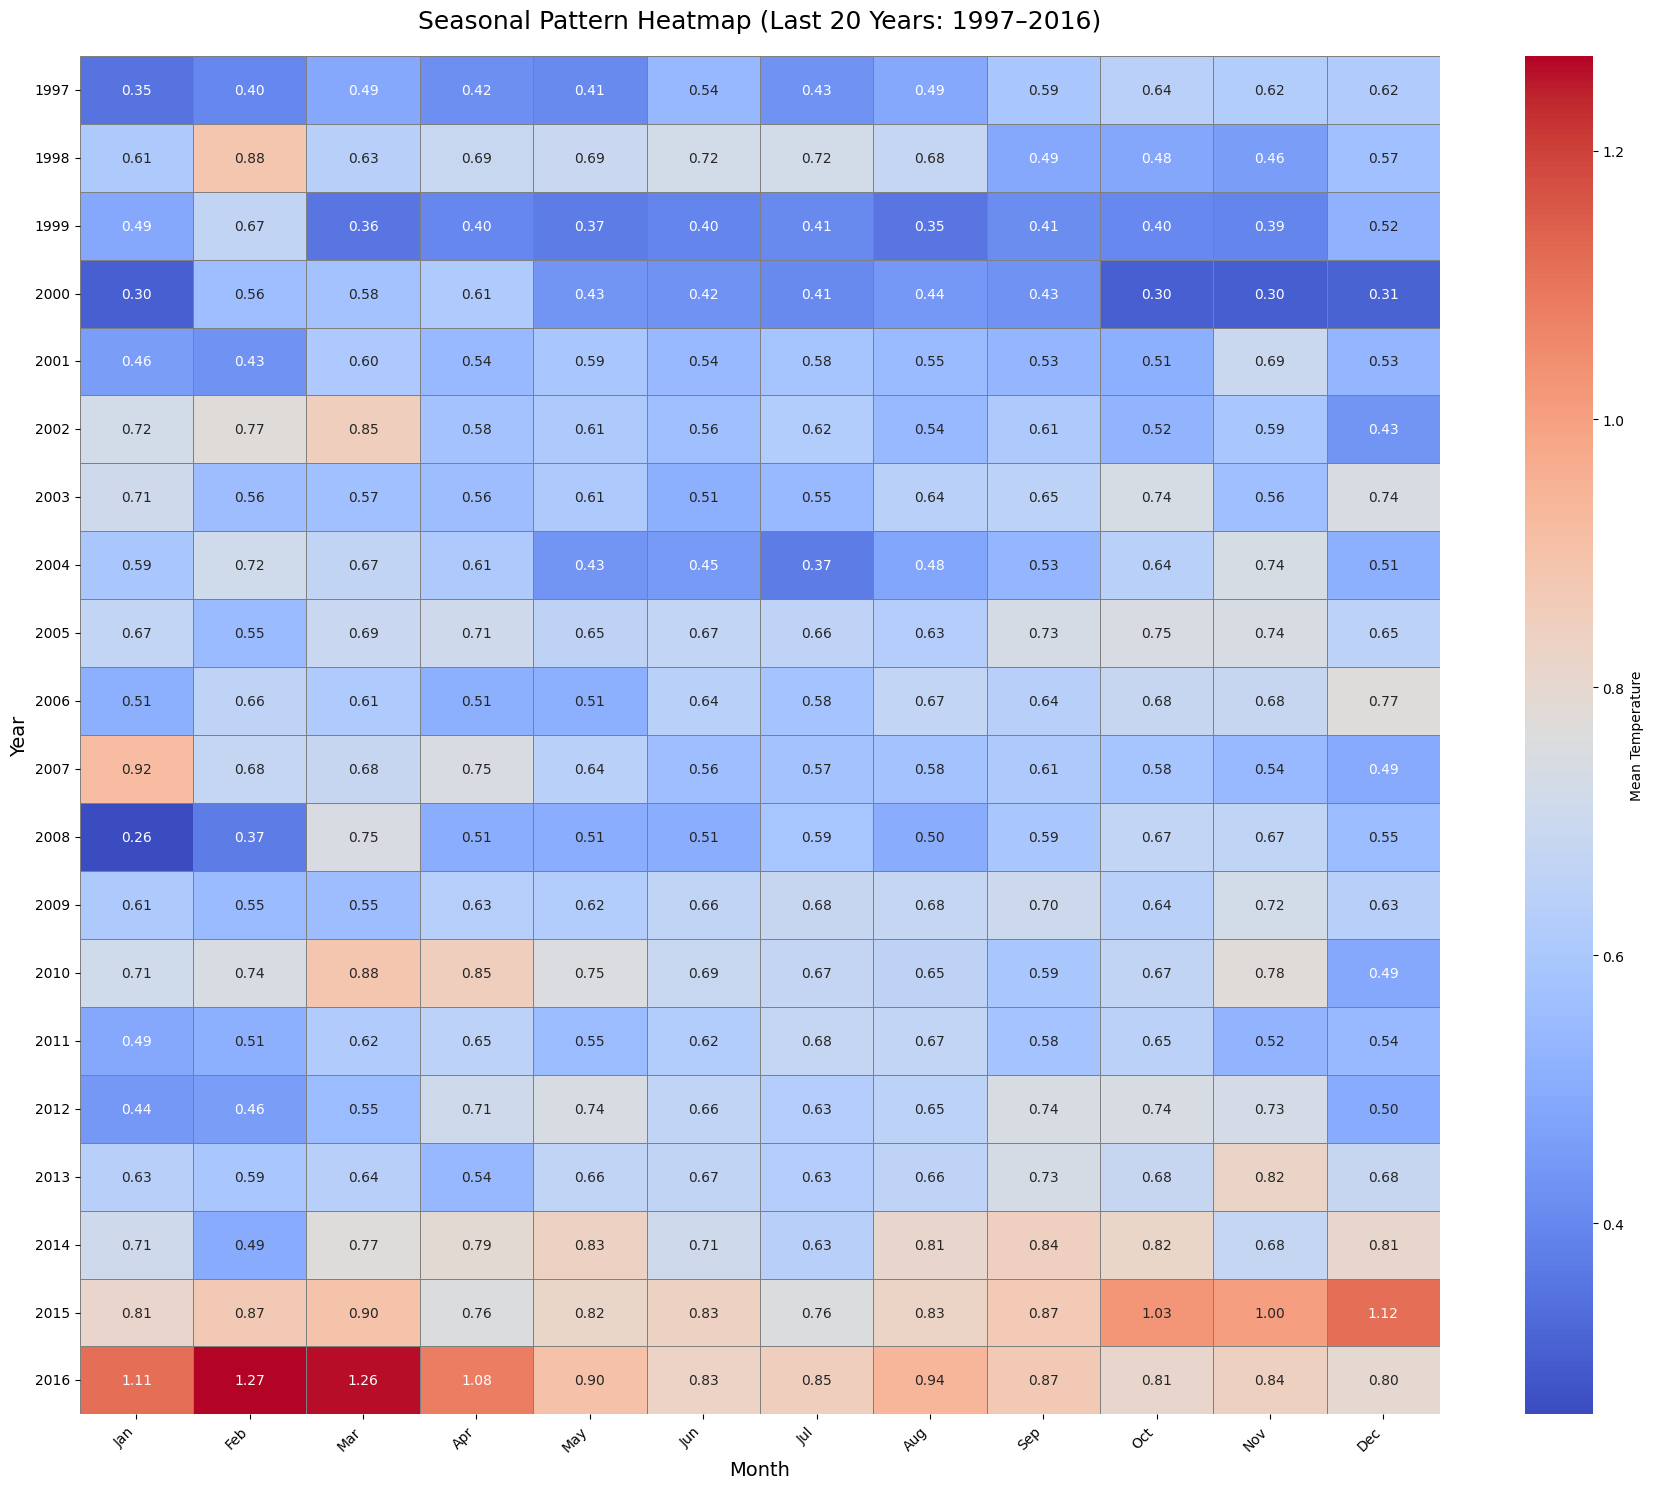

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# 1. Ensure Date column is in datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'], errors='coerce')

# 2. Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# 3. Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# 4. Group by Year & Month and take mean
seasonal_data_20 = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()

# 5. Pivot into heatmap-friendly format
heatmap_data_20 = seasonal_data_20.pivot(index='Year', columns='Month', values='Mean')

# 6. Replace month numbers with names (Jan, Feb, … Dec)
heatmap_data_20.columns = [calendar.month_abbr[m] for m in heatmap_data_20.columns]

# 7. Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(
    heatmap_data_20,
    cmap="coolwarm",
    cbar_kws={'label': 'Mean Temperature'},
    linewidths=0.5,
    linecolor="gray",
    annot=True, fmt=".2f"   # optional: shows values on the heatmap
)

plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})", fontsize=18, pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

ans: A highly informative plot is boxplots, with months placed along X-axis and temperature distribution placed along Y-axis. In this way we can observe both central trend and temperature visibility for each month.


/tmp/ipython-input-3022396524.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_last50, x="Month_Name", y="Mean", palette="coolwarm")


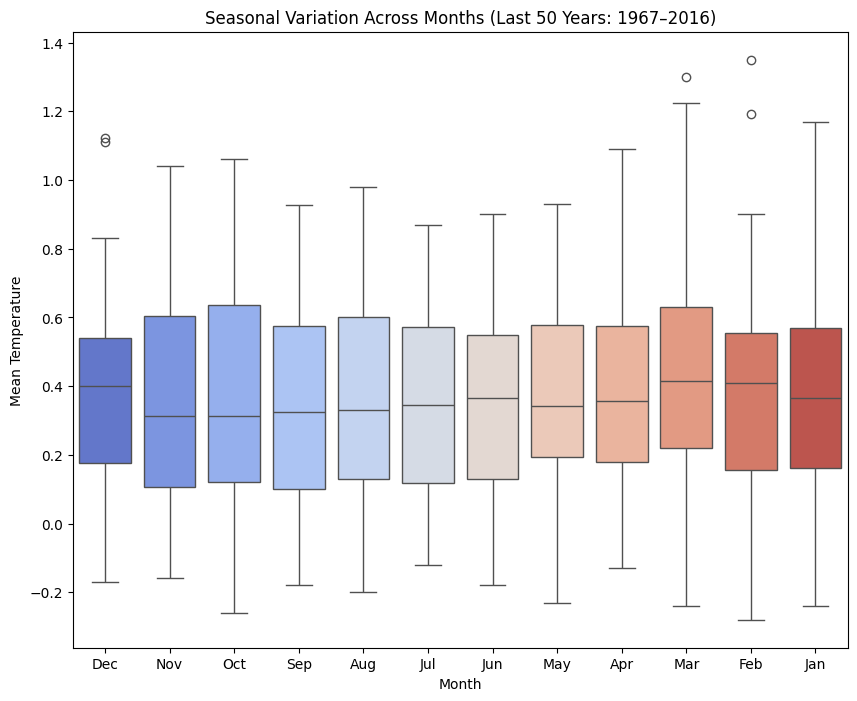

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49].copy()

# Add month names
df_last50['Month_Name'] = df_last50['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data=df_last50, x="Month_Name", y="Mean", palette="coolwarm")
plt.title(f"Seasonal Variation Across Months (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

In [ ]:
from google.colab import files
uploaded = files.upload()   # Choose your syntheticdata_csv.csv
df_syn = pd.read_csv("Synthetic_Data_2025-09-18.csv")
print(df_syn.head())


Saving Synthetic_Data_2025-09-18.csv to Synthetic_Data_2025-09-18 (2).csv
       Age  BloodPressure  HeartRate  Cholesterol  BloodSugar  \
0  48.9672        96.6822    75.3878     209.3334    132.1444   
1  80.0036       141.6217    57.0018     169.5862    108.6848   
2  62.1090        90.9614    56.9324     174.1043    109.6714   
3  27.0628       132.0603    85.2470     196.6521     71.7100   
4  68.0029       122.7896    58.3116     236.8029     77.6854   

              Notes  
0         No issues  
1   Needs follow-up  
2  Regular check-up  
3   Needs follow-up  
4  Regular check-up  


       Age  BloodPressure  HeartRate  Cholesterol  BloodSugar  \
0  48.9672        96.6822    75.3878     209.3334    132.1444   
1  80.0036       141.6217    57.0018     169.5862    108.6848   
2  62.1090        90.9614    56.9324     174.1043    109.6714   
3  27.0628       132.0603    85.2470     196.6521     71.7100   
4  68.0029       122.7896    58.3116     236.8029     77.6854   

              Notes  
0         No issues  
1   Needs follow-up  
2  Regular check-up  
3   Needs follow-up  
4  Regular check-up  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1000 non-null   float64
 1   BloodPressure  1000 non-null   float64
 2   HeartRate      1000 non-null   float64
 3   Cholesterol    1000 non-null   float64
 4   BloodSugar     1000 non-null   float64
 5   Notes          1000 non-null   object 
dtypes: float64(5), 

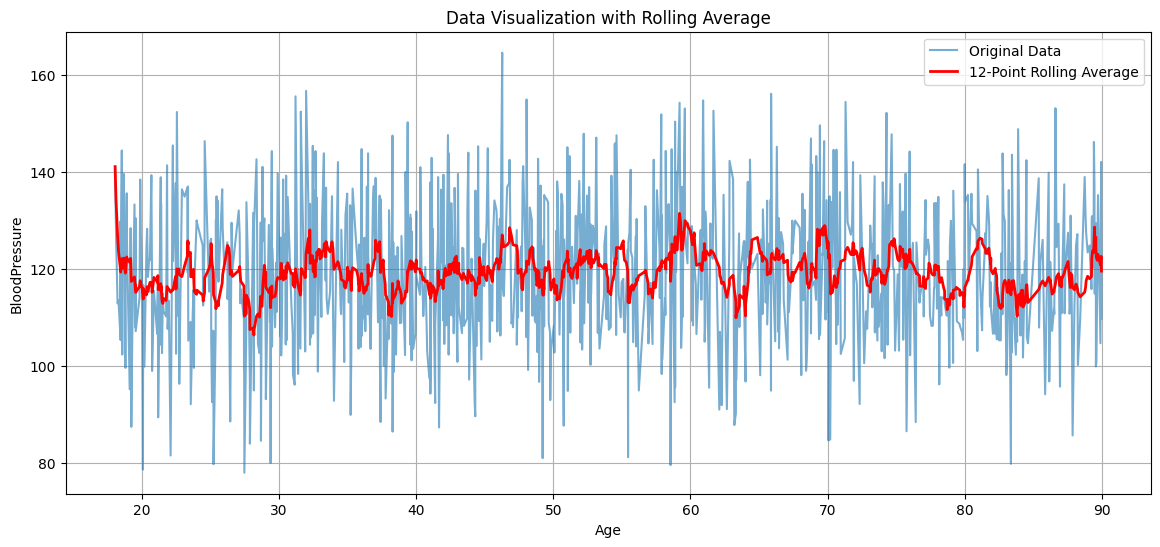

In [14]:
#rolling average
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file_path = "Synthetic_Data_2025-09-18.csv"
df_syn = pd.read_csv(file_path)

# 2. Quick look at the data
print(df_syn.head())
print(df_syn.info())

# 3. Convert age column to numeric (if needed)
df_syn['Age'] = pd.to_numeric(df_syn['Age'], errors='coerce')

# 4. Sort by age
df_syn = df_syn.sort_values('Age')

# 5. Plot raw data
plt.figure(figsize=(14,6))
plt.plot(df_syn['Age'], df_syn['BloodPressure'], label='Original Data', alpha=0.6)

# 6. Rolling Average (window = 12, adjust as needed)
df_syn['Rolling_Avg'] = df_syn['BloodPressure'].rolling(window=12, min_periods=1).mean()

# 7. Plot smoothed trend
plt.plot(df_syn['Age'], df_syn['Rolling_Avg'], color='red', linewidth=2, label='12-Point Rolling Average')

plt.title("Data Visualization with Rolling Average")
plt.xlabel("Age")
plt.ylabel("BloodPressure")
plt.legend()
plt.grid(True)
plt.show()



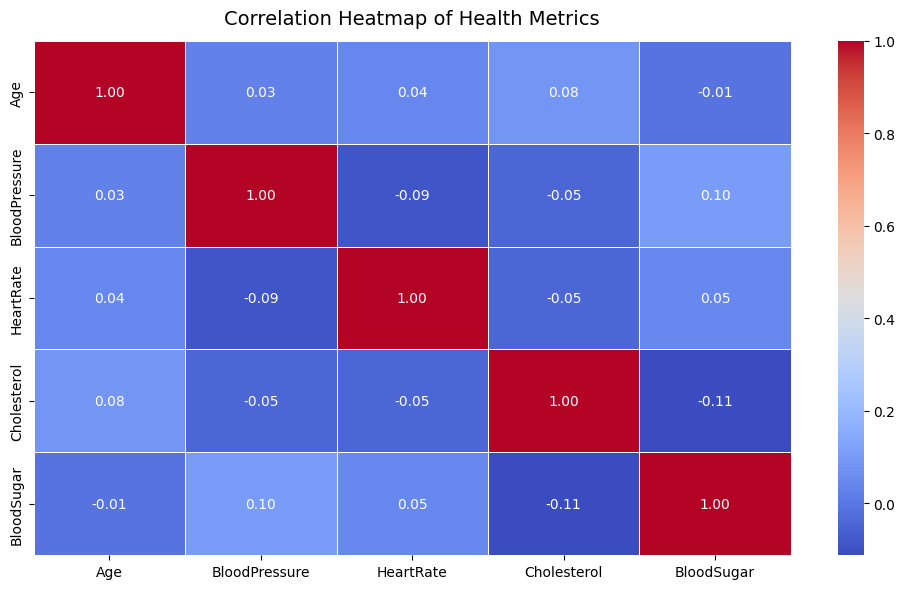

In [14]:
#correlation heatmap of health matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df_syn.drop(columns="Notes").corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Health Metrics", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2562280467.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_syn, x="Notes", y=col, palette="Set2")
/tmp/ipython-input-2562280467.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_syn, x="Notes", y=col, palette="Set2")
/tmp/ipython-input-2562280467.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_syn, x="Notes", y=col, palette="Set2")
/tmp/ipython-input-2562280467.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` 

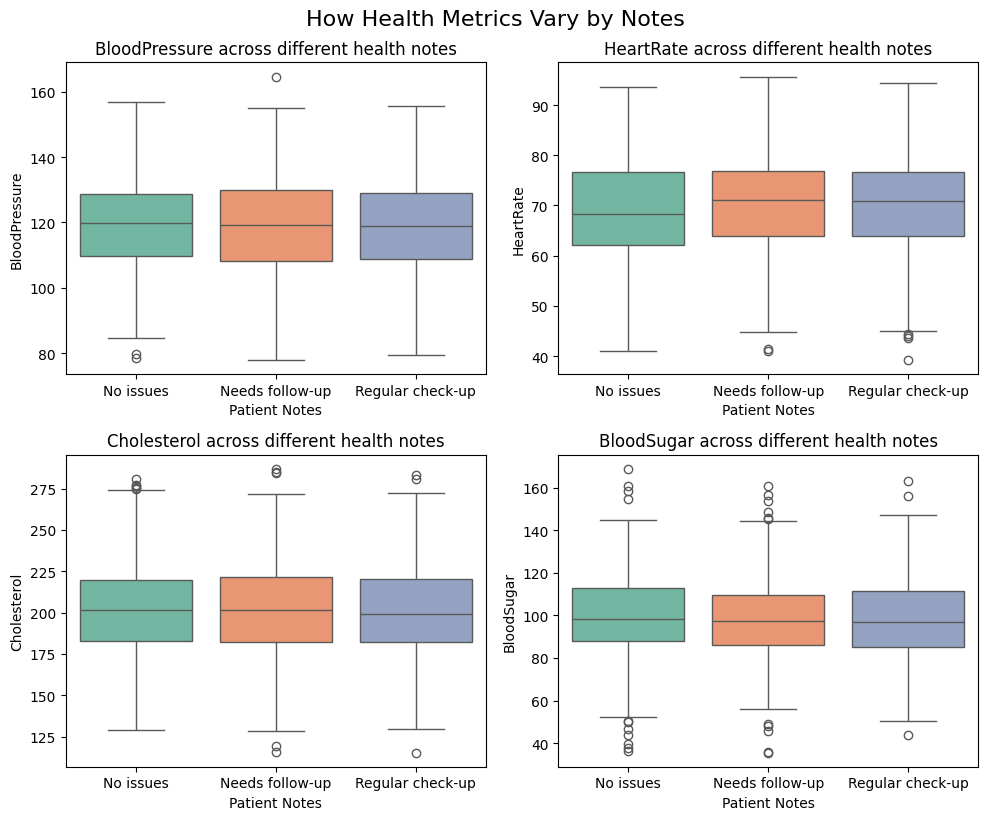

In [13]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Picking
metrics = ["BloodPressure", "HeartRate", "Cholesterol", "BloodSugar"]

# Make the figure
plt.figure(figsize=(10, 8))

# loop for boxplot
for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)   # 2x2 grid of plots
    sns.boxplot(data=df_syn, x="Notes", y=col, palette="Set2")

    # titles and labels
    plt.title(f"{col} across different health notes", fontsize=12)
    plt.xlabel("Patient Notes")
    plt.ylabel(col)

# Adjust spacing to avoid overlap
plt.tight_layout()
plt.suptitle("How Health Metrics Vary by Notes", fontsize=16, y=1.02)
plt.show()
